<a href="https://colab.research.google.com/github/medaminemghirbi/Freelancy/blob/main/Project_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Loading Data from drive**

In [30]:
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/project_IA/diabetes.csv")

**2. Display the  Dataset of diabetes**

In [31]:
# Explore the dataset
print("Dataset shape:", df.shape)
print("\n First few rows of the dataset:")
print(df.head())

Dataset shape: (768, 9)

 First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**3. statistic of dataset**

In [32]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

 **4. Data Cleaning**

1.   Check for Missing/Null Values




In [33]:
# Check for missing/null values
count_miss = df.fillna(df.mean(), inplace=True)
count_null = df.isnull().sum()
print("\n Null values:")
print(count_null)
print("\n Missing  values:")
print(count_miss)


 Null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Missing  values:
None




2.   Remove duplicate value if exist




In [34]:
df.drop_duplicates(inplace=True)

**5. Data Visualization**

1.  Data visualization

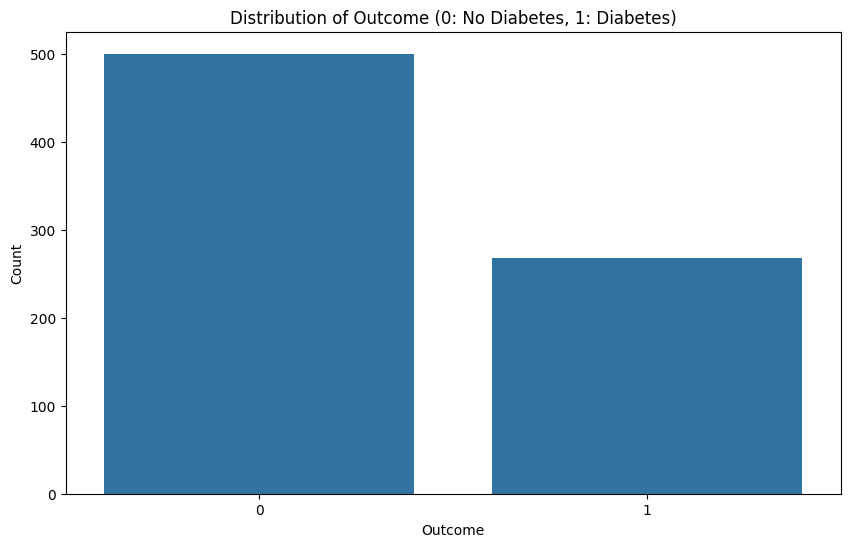

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Outcome (0: No Diabetes, 1: Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


2. Correlation heatmap



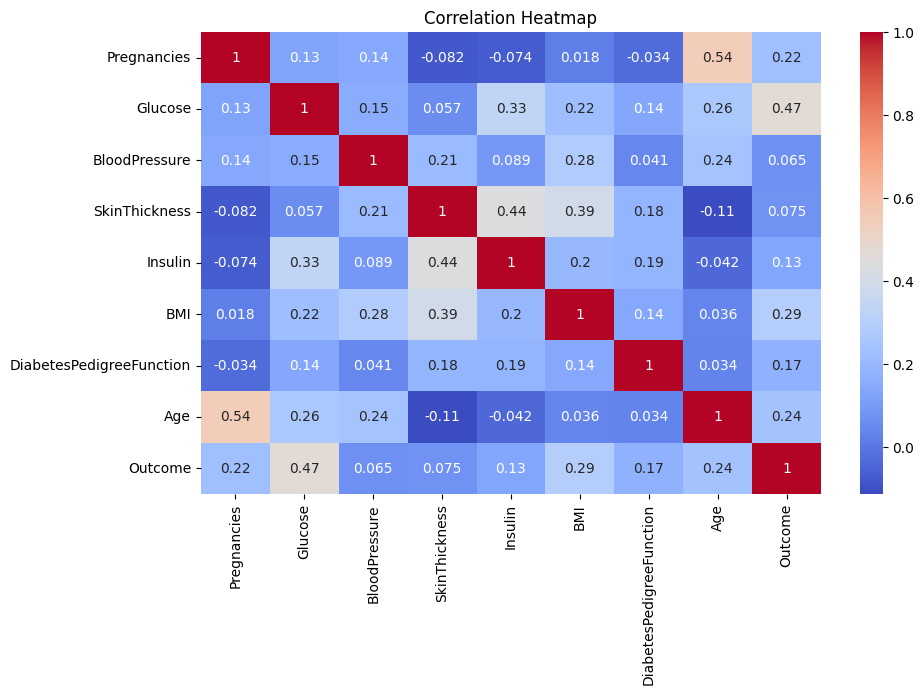

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**6. Split the Data into Features and Target**


In [37]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

**7. Split the Data into Training and Testing Sets**

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**8. Standardize the Features**

In [39]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**9. Train and Evaluate Models**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

def perform_grid_search(X_train_scaled, X_test_scaled, y_train, y_test):
    # Define the parameter grids for each model
    param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_grid_dt = {'max_depth': [None, 5, 10, 15, 20]}
    param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 5, 10, 15, 20]}
    param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    # Define parameter grids
    param_grids = {
        "Logistic Regression": param_grid_lr,
        "Decision Tree": param_grid_dt,
        "Random Forest": param_grid_rf,
        "K-Nearest Neighbors": param_grid_knn
    }

    # Perform grid search and store results
    results = {}
    for name, model in models.items():
        param_grid = param_grids[name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        y_pred = grid_search.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_,
            "test_accuracy": accuracy,
            "test_f1_score": f1,
            "classification_report": report
        }

    return results

def print_prediction_table(results):
    print("{:<20} {:<15} {:<15} {:<15} {:<15}".format("Model", "Accuracy", "F1 Score", "Precision", "Recall"))
    print("-" * 75)
    for name, result in results.items():
        accuracy = result["test_accuracy"]
        f1 = result["test_f1_score"]
        precision = result["classification_report"]["weighted avg"]["precision"]
        recall = result["classification_report"]["weighted avg"]["recall"]
        print("{:<20} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f}".format(name, accuracy, f1, precision, recall))

# Usage example
results = perform_grid_search(X_train_scaled, X_test_scaled, y_train, y_test)
print_prediction_table(results)


Model                Accuracy        F1 Score        Precision       Recall         
---------------------------------------------------------------------------
Logistic Regression  0.7532          0.6607          0.7554          0.7532         
Decision Tree        0.7987          0.6931          0.7955          0.7987         
Random Forest        0.7273          0.6250          0.7296          0.7273         
K-Nearest Neighbors  0.7078          0.5794          0.7045          0.7078         


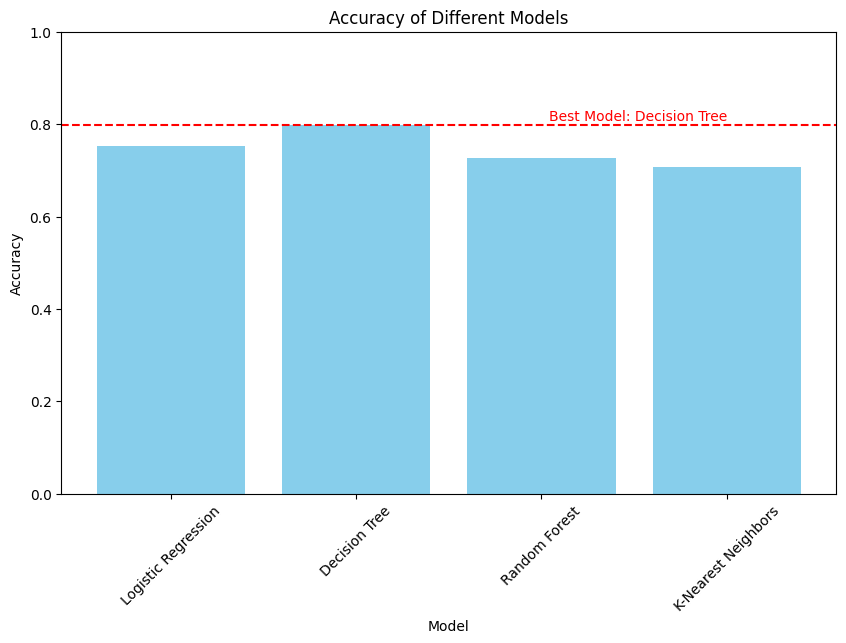

In [41]:
def plot_best_model_accuracy(results):
    # Find the best model based on accuracy
    best_model = max(results, key=lambda x: results[x]["test_accuracy"])
    best_accuracy = results[best_model]["test_accuracy"]

    # Plot accuracy for each model
    model_names = list(results.keys())
    test_accuracies = [results[name]["test_accuracy"] for name in model_names]

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, test_accuracies, color='skyblue')
    plt.title('Accuracy of Different Models')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

    # Highlight the best model
    plt.axhline(y=best_accuracy, color='red', linestyle='--')
    plt.text(len(model_names) - 1, best_accuracy + 0.01, f'Best Model: {best_model}', horizontalalignment='right', color='red')

    plt.show()
plot_best_model_accuracy(results)
